<div style="font-family: 'Verdana';">
    <h2 style="color: #4a86e8; border-bottom: 2px solid #4a86e8; display: inline-block; padding-bottom: 5px;">
        0. Imports
    </h2>
</div>

In [351]:
# Imports
import sys

sys.path.append('../')
import src.finance_ml.clustering.Hierarchical
import matplotlib.pyplot as plt
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.clustering.Hierarchical import Hierarchical


<module 'src.finance_ml.clustering.Hierarchical' from 'C:\\Users\\mishr\\Desktop\\Projects\\ML-in-Finance\\src\\finance_ml\\clustering\\Hierarchical.py'>

<div style="font-family: 'Verdana';">
    <h2 style="color: #4a86e8; border-bottom: 2px solid #4a86e8; display: inline-block; padding-bottom: 5px;">
        1. Reading all the assets for processing and create Dataloader
    </h2>
</div>

In [352]:
import os

def list_files_and_folders_with_subdirectories(directory):
    """
    List all files and folders in the specified directory and its immediate subdirectories.

    Args:
    directory (str): The path of the directory to list contents of.

    Returns:
    dict: Dictionary with each item in the directory as keys and their contents (if any) as values.
    """
    contents = {}
    try:
        # Iterate over all items in the directory
        for item in os.listdir(directory):
            item_path = os.path.join(directory, item)

            # Check if the item is a directory
            if os.path.isdir(item_path):
                # List contents of the subdirectory
                contents[item] = os.listdir(item_path)
            else:
                # If it's a file, just list the file
                contents[item] = None
    except FileNotFoundError:
        return f"No such directory: {directory}"
    except PermissionError:
        return f"Permission denied to access: {directory}"
    except Exception as e:
        return f"An error occurred: {e}"

    return contents

# Replace 'your_directory_path' with the path of your directory
directory_path = "../data"
directory_file_dictionary = list_files_and_folders_with_subdirectories(directory_path)
# print('List of all the file under the different types of stock folder')
# print(directory_file_dictionary)

directory_file_dictionary.keys()
dataloader_path_dictionary: dict = {}
for folder in directory_file_dictionary.keys():
    for filename in directory_file_dictionary[folder]:
        stock_name = filename.split('_')[0]
        dataloader_path_dictionary[stock_name]= '{base}/{folder}/{filename}'.format(base=directory_path,folder=folder,filename=filename)
print('\n\n Dictionary created as required by the dataloader class')
# print(dataloader_path_dictionary)

# multiples columns can be read. But for the hierarchical clustering we can restrict ourselves with just open column to demonstrate
# dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', 'CLOSE', 'LOW', 'TRANSACTIONS'])
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['OPEN'])

dataset = dataloader.load_dataset(dataloader_path_dictionary)



 Dictionary created as required by the dataloader class


<div style="font-family: 'Verdana';">
    <h2 style="color: #4a86e8; border-bottom: 2px solid #4a86e8; display: inline-block; padding-bottom: 5px;">
        2. Create Hierarchical class object
    </h2>
</div>

In [353]:
# Creating the hierarchical object with a copy of original dataset 
df = dataset.copy()
labels = list(dataloader_path_dictionary.keys())
hierarchical = Hierarchical(df,labels,24)

<div style="font-family: 'Verdana';">
    <h2 style="color: #4a86e8; border-bottom: 2px solid #4a86e8; display: inline-block; padding-bottom: 5px;">
        3. Pipeline
    </h2>
</div>


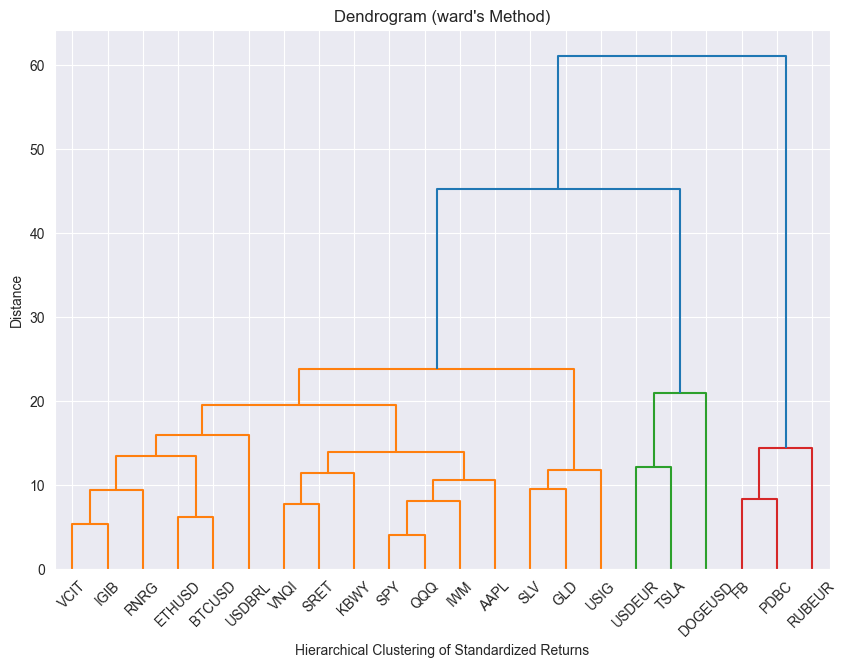

In [354]:
# preprocessing can be skipped if user wish to apply their own
hierarchical.preprocessing()
# find_linkage can be provided with different values per stock as dataframe
hierarchical.find_linkage(hierarchical.returns_df)

<div style="font-family: 'Arial'; font-size: 14px; color: #333;">
    <h2 style="color: #4a86e8;">3. Pipeline Alternate</h2>
    <ul>
        <li>User can directly use the <code style="background-color: #f5f5f5; color: #c7254e;">find_linkage</code> method without the need to preprocess with the built-in method.</li>
        <li>Replace <code style="background-color: #f5f5f5; color: #c7254e;">dataset</code> and <code style="background-color: #f5f5f5; color: #c7254e;">labels</code> with your own:</li>
    </ul>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        hierarchical_obj = Hierarchical(None,labels)
        hierarchical_obj.find_linkage(dataset)
    </pre>
</div>


<div style="font-family: 'Verdana';">
    <h2 style="color: #4a86e8; border-bottom: 2px solid #4a86e8; display: inline-block; padding-bottom: 5px;">
        4. Visualize
    </h2>
</div>

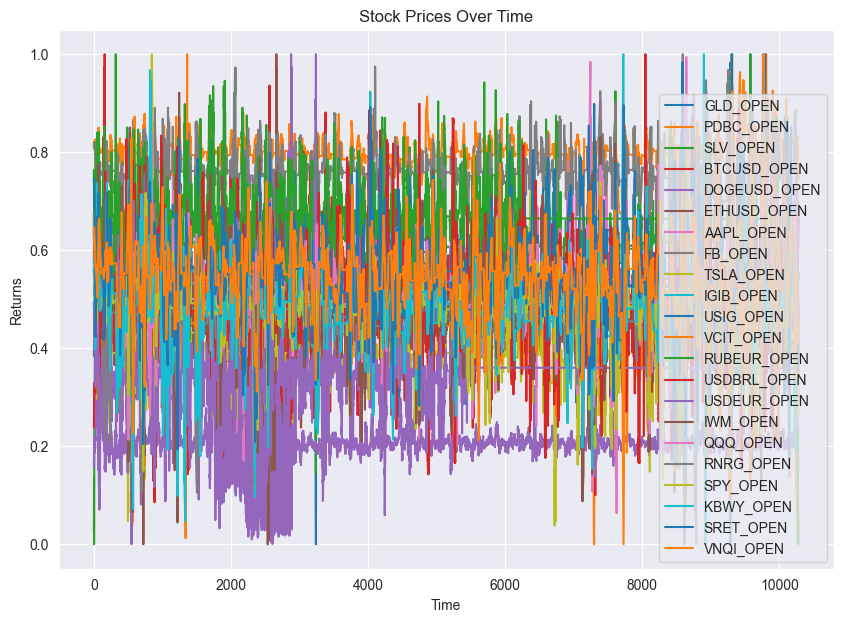

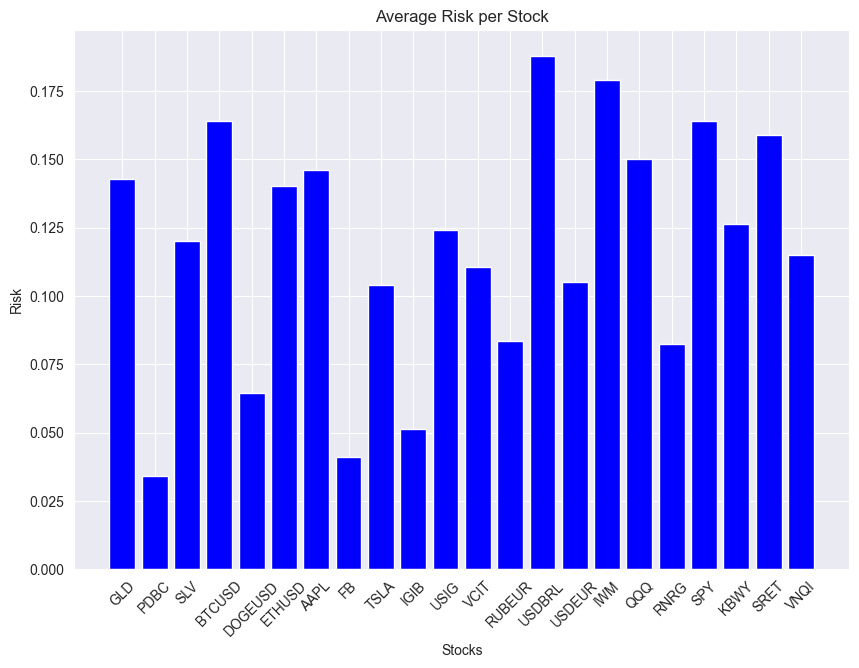

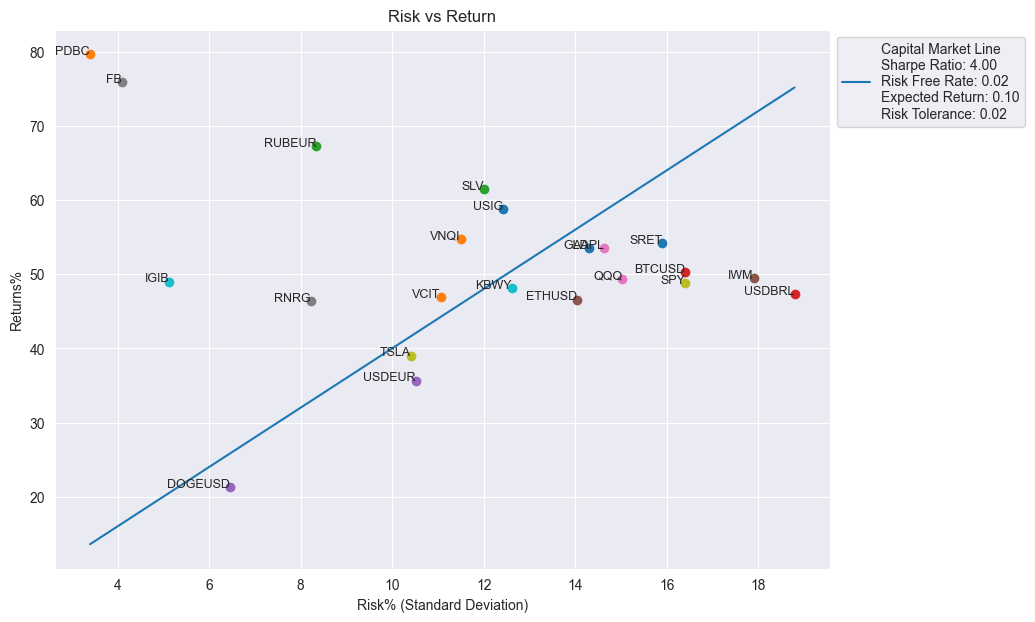

In [355]:
hierarchical.plot_stocks_timeline(hierarchical.returns_df,y_label='Returns')
hierarchical.plot_stocks_avg_risk()
hierarchical.plot_stocks_risk_vs_return(plot_sharpe_ratio=True)